https://www.tensorflow.org/tutorials/keras/basic_classification

In [0]:
# importing tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

1.12.0


In [0]:
# download fashion mnist dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
# class names not included with the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [23]:
# Exploring the data

print(train_images.shape)
print(len(train_labels))
print(set(train_labels))
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
(10000, 28, 28)
10000


(28, 28)


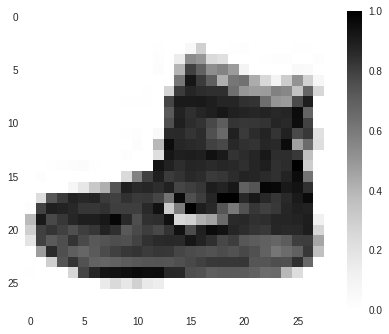

In [24]:
# For Data pre-processing

print(train_images[0].shape)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [0]:
# Rescaling the pixel values

train_images = train_images / 255.0

test_images = test_images / 255.0

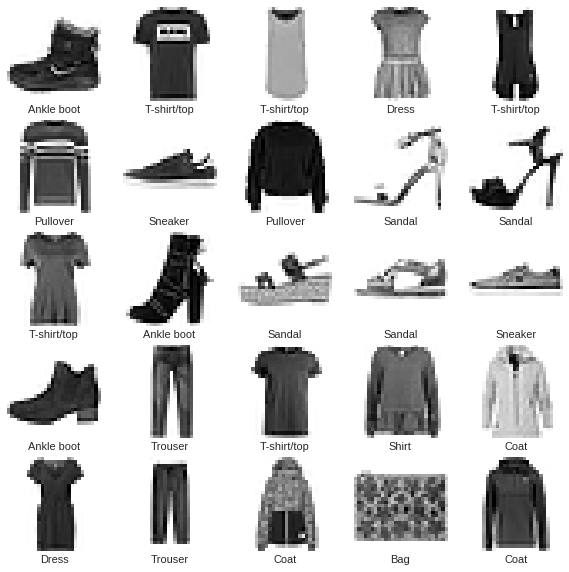

In [26]:
# Display the first 25 images from the training set and display the class name below each image. Verify that the data 
# is in the correct format and we're ready to build and train the network.

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [0]:
# Setting the Network layers and creating the model
from keras import regularizers
model = keras.Sequential([
    
    # The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array 
    # (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels
    keras.layers.Flatten(input_shape=(28, 28)),
    
    # The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns 
    # an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the 
    # current image belongs to one of the 10 classes.
    keras.layers.Dense(128, 
                       activation=tf.nn.relu,
                       kernel_initializer='he_normal',
                       bias_initializer='zeros'),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
# Training the model

model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 5s 86us/step - loss: 1.0608 - acc: 0.6632
Epoch 2/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.6215 - acc: 0.7770
Epoch 3/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.5484 - acc: 0.8052
Epoch 4/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.5089 - acc: 0.8211
Epoch 5/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.4843 - acc: 0.8302
Epoch 6/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.4667 - acc: 0.8358
Epoch 7/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.4526 - acc: 0.8410
Epoch 8/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.4416 - acc: 0.8445
Epoch 9/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.4326 - acc: 0.8479
Epoch 10/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.4247 - acc: 0.8505

In [38]:
# Evaluating accuracy

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 47us/step
Test accuracy: 0.8689


In [0]:
# Making predictions

predictions = model.predict(test_images)

In [40]:
predictions[0]

array([1.6926812e-08, 1.6451950e-10, 2.9652466e-07, 4.6654415e-07,
       3.5561202e-06, 3.6765929e-02, 1.4768750e-05, 2.8819233e-02,
       1.2952625e-03, 9.3310052e-01], dtype=float32)

In [41]:
# Returns the indices of the maximum values along an axis
print(np.argmax(predictions[0]))
print(test_labels[0])

9
9


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [0]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

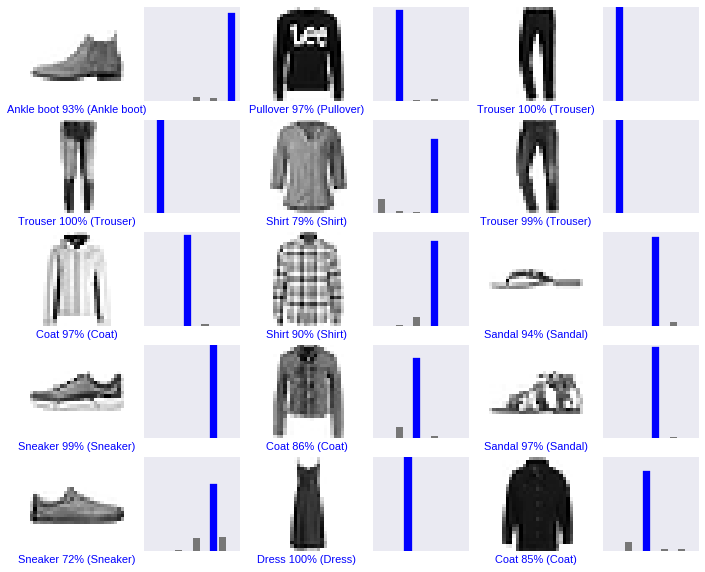

In [45]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [0]:
# !apt-get -qq install -y graphviz && pip install -q pydot
import pydot

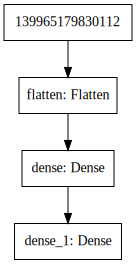

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')